In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
df = pd.read_csv("market-price.csv")
df.columns = ['Date','price']
df_norm = df.drop(['Date'], 1, inplace=True)

In [9]:
prediction_days = 30

df_train= df[:len(df)-prediction_days]
df_test= df[len(df)-prediction_days:]
# df_test = pd.read_csv("last7days.csv")
print(df_train.head())
print('/////////////////////////////////////////')
print (df_test.head())

    price
0  386.49
1  373.04
2  373.74
3  375.80
4  372.61
/////////////////////////////////////////
            price
699  15199.355000
700  17174.120000
701  17319.198000
702  16651.471667
703  15265.906667


In [10]:
training_set = df_train.values
training_set = min_max_scaler.fit_transform(training_set)

x_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
x_train = np.reshape(x_train, (len(x_train), 1, 1))

In [11]:
num_units = 2
activation_function = 'sigmoid'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 10
num_epochs = 100

# Initialize the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = num_units, activation = activation_function, input_shape=(None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = optimizer, loss = loss_function)

# Using the training set to train the model
regressor.fit(x_train, y_train, batch_size = batch_size, epochs = num_epochs)
regress

Epoch 1/100
698/698 [==============================] - 0s 540us/step - loss: 0.0465
Epoch 2/100
698/698 [==============================] - 0s 294us/step - loss: 0.0317
Epoch 3/100
698/698 [==============================] - 0s 298us/step - loss: 0.0293
Epoch 4/100
698/698 [==============================] - 0s 329us/step - loss: 0.0287
Epoch 5/100
698/698 [==============================] - 0s 299us/step - loss: 0.0283
Epoch 6/100
698/698 [==============================] - 0s 415us/step - loss: 0.0278
Epoch 7/100
698/698 [==============================] - 0s 292us/step - loss: 0.0274
Epoch 8/100
698/698 [==============================] - 0s 294us/step - loss: 0.0268
Epoch 9/100
698/698 [==============================] - 0s 292us/step - loss: 0.0263
Epoch 10/100
698/698 [==============================] - 0s 292us/step - loss: 0.0257
Epoch 11/100
698/698 [==============================] - 0s 296us/step - loss: 0.0251
Epoch 12/100
698/698 [==============================] - 0s 297us/step - lo

698/698 [==============================] - 0s 471us/step - loss: 1.7459e-04
Epoch 96/100
698/698 [==============================] - 0s 451us/step - loss: 1.7312e-04
Epoch 97/100
698/698 [==============================] - 0s 488us/step - loss: 1.7328e-04
Epoch 98/100
698/698 [==============================] - 0s 458us/step - loss: 1.7451e-04
Epoch 99/100
698/698 [==============================] - 0s 491us/step - loss: 1.7500e-04
Epoch 100/100
698/698 [==============================] - 0s 469us/step - loss: 1.7593e-04


In [12]:
test_set = df_test.values

inputs = np.reshape(test_set, (len(test_set), 1))
inputs = min_max_scaler.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))

predicted_price = regressor.predict(inputs)
predicted_price = min_max_scaler.inverse_transform(predicted_price)

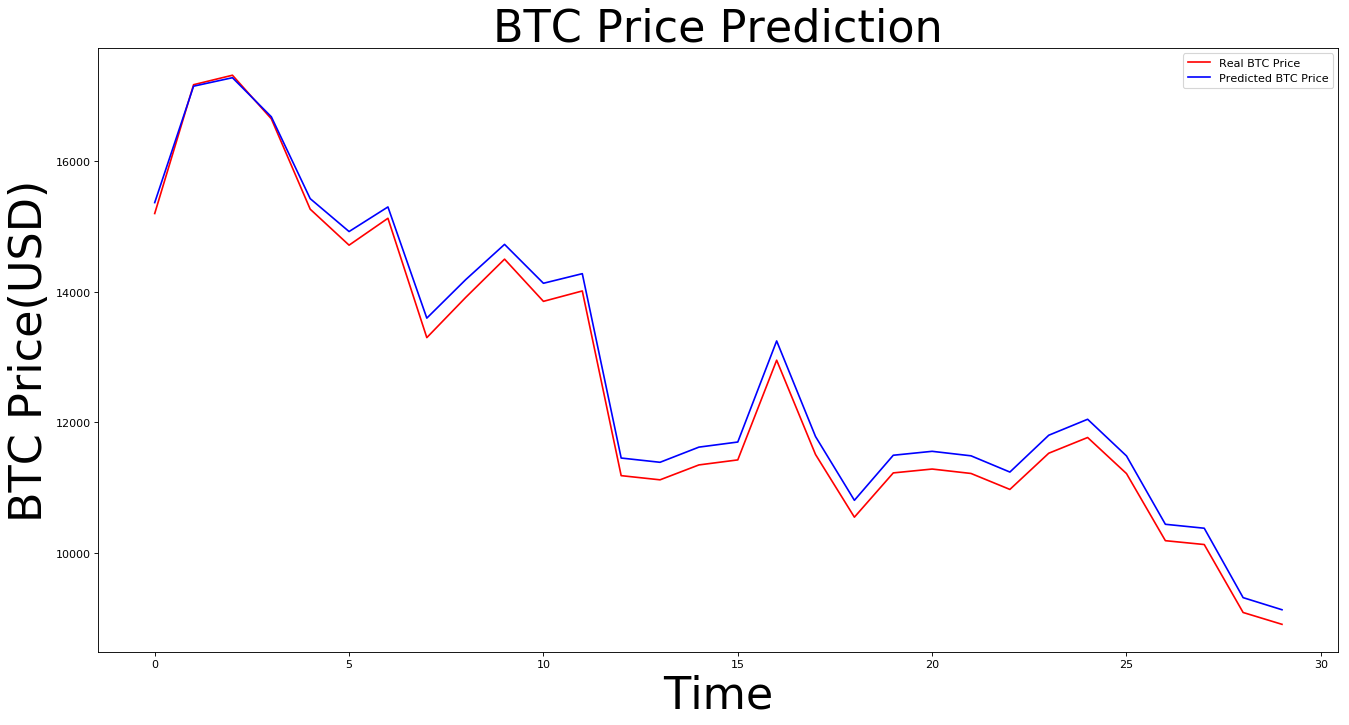

In [13]:
plt.figure(figsize=(20, 10), dpi=80, facecolor = 'w', edgecolor = 'k')

plt.plot(test_set[:, 0], color='red', label='Real BTC Price')
plt.plot(predicted_price[:, 0], color = 'blue', label = 'Predicted BTC Price')

plt.title('BTC Price Prediction', fontsize = 40)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize = 40)
plt.legend(loc = 'best')
plt.show()